<a href="https://colab.research.google.com/github/Yaswanthreddy23/HDS5210_InClassYaswanth/blob/master/Copy_of_week12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [27]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('condemn.txt')
condemnations.shape

<ipython-input-27-4427bda89e9a>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('condemn.txt')


(32586, 40)

In [28]:
condemnations = pd.read_csv('condemn.txt', low_memory=False)
condemnations.shape
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') &
                              (condemnations['InspectDate'] <= '2014-12-31')]

In [29]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [30]:
import numpy as np
###creating a pivot tabel..
###first we need to create a year column
condemnations['Year'] = condemnations['InspectDate'].dt.year

### Then Creat Pivot tabel
by_year = condemnations.pivot_table (
    values='AcctNum',
    index=condemnations['InspectDate'].dt.year,
    columns='Status',
    aggfunc=np.ma.count,
    fill_value=0
)
# checking out the data frame by year.
by_year

Status,B,L,R,W
InspectDate,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


In [31]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='InspectDate'>

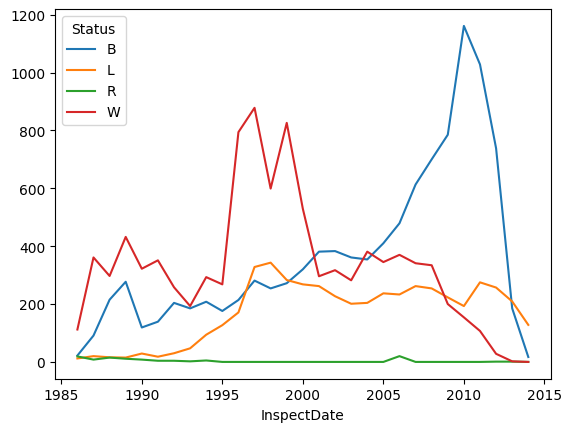

In [32]:
%matplotlib inline
by_year.plot()

---

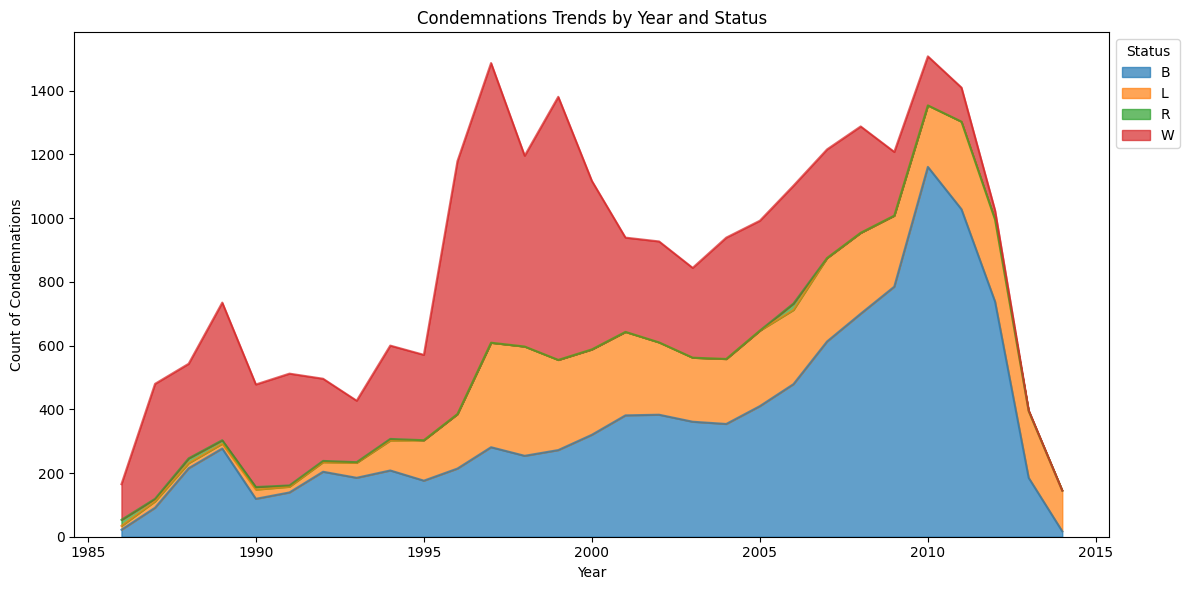

In [33]:
# Re-group the data for the 'by_year' variable using a placeholder dataset
# Assuming 'condemnations' DataFrame is available from earlier steps
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot module

# Group data by year and status for analysis
by_year = condemnations.groupby([condemnations['InspectDate'].dt.year, 'Status']).size().unstack(fill_value=0)

# Plotting an area plot as an alternative visualization
by_year.plot(kind='area', figsize=(12, 6), title="Condemnations Trends by Year and Status", alpha=0.7)

# Add labels and legend
plt.xlabel("Year") # Now 'plt' is recognized and can be used for plotting functions
plt.ylabel("Count of Condemnations")
plt.legend(title="Status", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()





Condemnations increased significantly from the late 1980s, peaking around the mid-2000s before sharply declining after 2010.

 "W" status (red) contributed the largest share of condemnations throughout the years, especially during the peak period.

 The "B" (blue) and "L" (orange) categories also show growth over time, although "B" maintains a consistently strong contribution.

 All statuses experienced a sharp decrease after 2010, indicating an overall drop in condemnations for all categories.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [34]:
import pandas as pd
import pandas as pd

#  Load the data
meetings = pd.read_csv('meetings.csv')

#  Extract 'startDate' from 'startTime' (first 10 characters for date part)
meetings['startDate'] = meetings['startTime'].str[0:10]

meetings['Period'] = None
meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28'), 'Period'] = 'Before'
meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27'), 'Period'] = 'During'

# Filter to include only rows in either "BEFORE" or "DURING" period
meetings = meetings.dropna(subset=['Period'])

In [35]:
summary = ...
summary = meetings.pivot_table(index='userName', columns='Period', values='meeting_uuid', aggfunc='count', fill_value=0)

#  Rename columns
summary.columns = ['Before', 'During']

# Calculate percent change (pctChange) from "Before" to "During"
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before']).replace([float('inf'), -float('inf')], 0).fillna(0)
###checking the input
summary.head()

,Before,During,pctChange
userName,,,
Drew.Marco,12,19,0.583333
amit.bhagat,17,30,0.764706
andrea.bryant.amitechsolutions,5,3,-0.400000
angie.warren,5,9,0.800000
chris.rogers.amitechsolutions,4,3,-0.250000


---

In [36]:
assert(len(summary) == 22)

In [37]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
